In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=1.4)

# 데이터 불러오기
train = pd.read_csv('train.csv')
test_ = pd.read_csv('test.csv')

test = test_.copy() # 데이터 보존

### 데이터 구조 훑어 보기

In [2]:
train.head()
#10개의 특성 가지고 있음

,index,month,day,hour,weather_condition,real_temp,skin_temp,humidity,windspeed,count
0,1,1,1,0,1,14.76,18.940,66.0,0.0000,48
1,2,1,1,1,1,14.76,17.425,66.0,8.9981,93
2,3,1,1,2,1,13.12,17.425,76.0,0.0000,75
3,4,1,1,3,1,12.30,16.665,81.0,0.0000,52
4,5,1,1,4,1,11.48,15.150,81.0,6.0032,8


In [3]:
test.head()
#count제외 9개의 특성 가지고 있음

,index,month,day,hour,weather_condition,real_temp,skin_temp,humidity,windspeed
0,1,1,18,0,2,18.86,22.725,77.0,22.0028
1,2,1,18,1,2,18.86,22.725,77.0,22.0028
2,3,1,18,2,2,18.04,21.970,51.0,32.9975
3,4,1,18,3,2,18.04,21.970,51.0,32.9975
4,5,1,18,4,1,13.94,14.395,46.0,35.0008


In [4]:
train.info() 
#데이터에 대한 간략한 설명, 전체행의 수, 각 특성의 데이터 타입, 
#널이 아닌갯수를 확인하는데 유용

### real_temp, skin_temp, humidity, windspeed 4개의 특성이 결측값 있음 확인 
#(4888이 전체 개수인데 real_temp는 4849개 있음.몇개의 구역은 이 특성을 가지고 있지 않음)

### weather_condition -> 1, 2로 이루어진 범주형 데이터임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4888 non-null   int64  
 1   month              4888 non-null   int64  
 2   day                4888 non-null   int64  
 3   hour               4888 non-null   int64  
 4   weather_condition  4888 non-null   int64  
 5   real_temp          4849 non-null   float64
 6   skin_temp          4827 non-null   float64
 7   humidity           4846 non-null   float64
 8   windspeed          4857 non-null   float64
 9   count              4888 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 382.0 KB


In [5]:
test.info() 

### test data역시 real_temp, skin_temp, humidity, windspeed 4개의 특성이 결측값 있음 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              576 non-null    int64  
 1   month              576 non-null    int64  
 2   day                576 non-null    int64  
 3   hour               576 non-null    int64  
 4   weather_condition  576 non-null    int64  
 5   real_temp          573 non-null    float64
 6   skin_temp          574 non-null    float64
 7   humidity           567 non-null    float64
 8   windspeed          572 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 40.6 KB


### 시각화 (데이터 분포 출력)

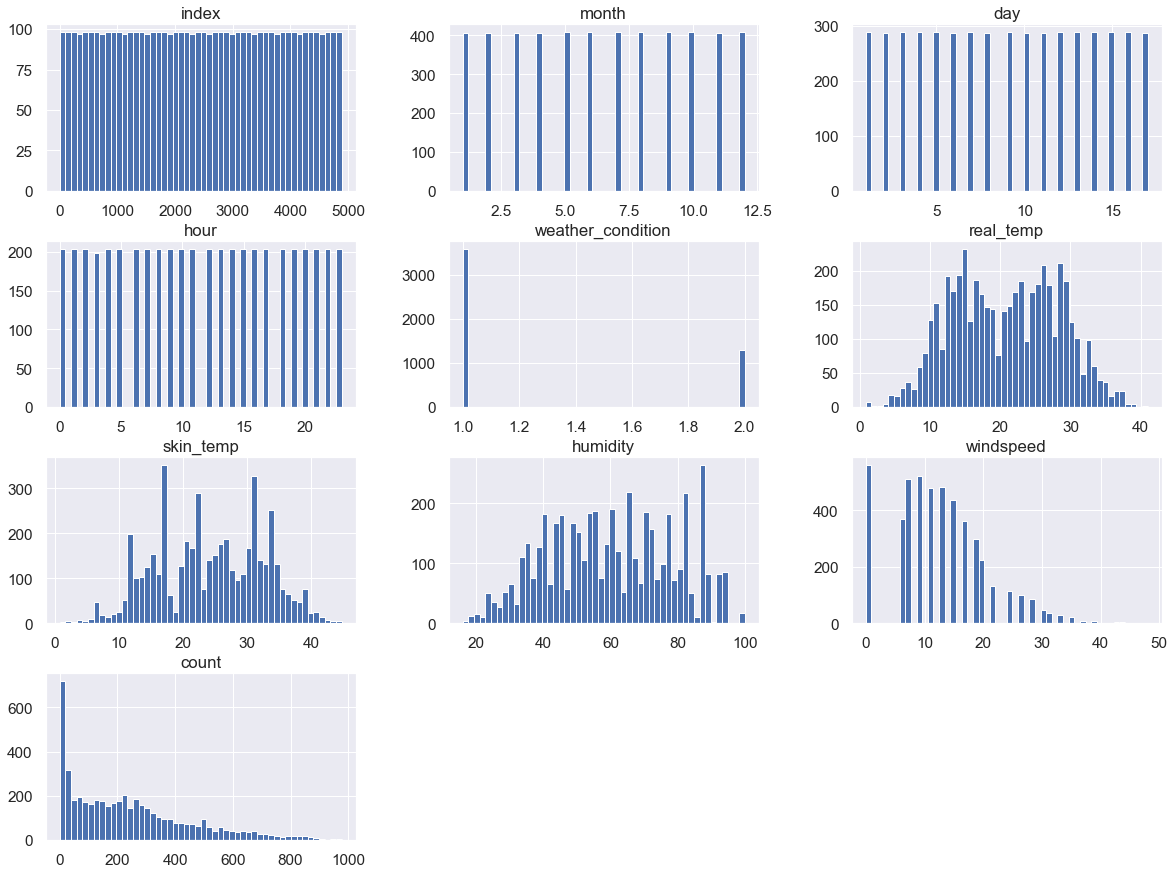

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

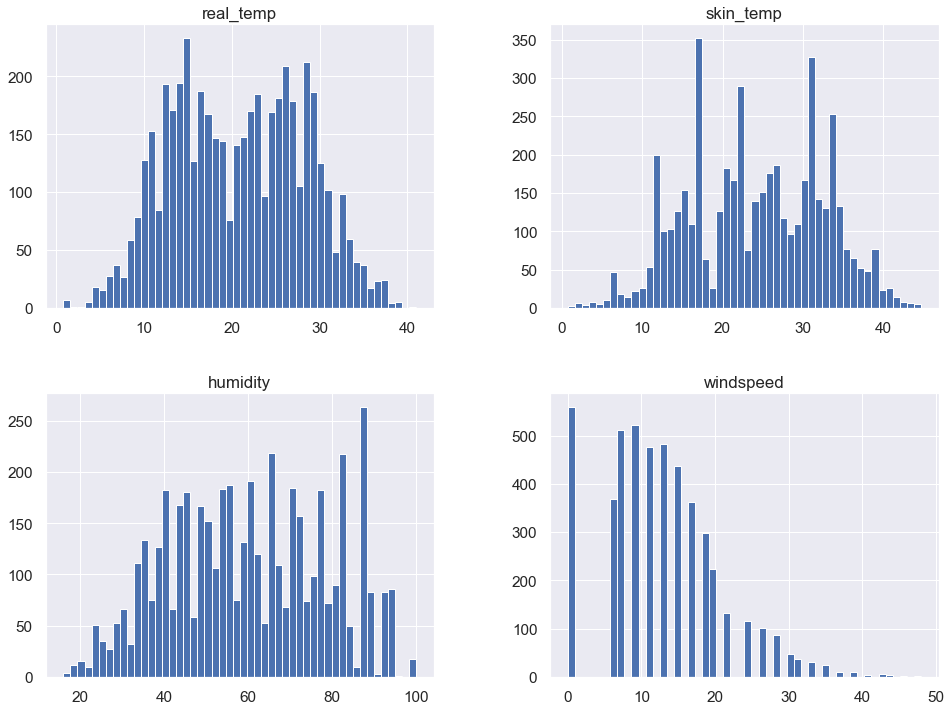

In [7]:
# 날씨 관련 정보의 분포를 히스토그램으로 확인
fig, ax = plt.subplots(figsize=(16,12))
train[['real_temp', 'skin_temp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)
 
plt.show()

In [8]:
# 분포를 보니 특이한 점으로는 windspeed (풍속)이 0인 데이터가 많이 들어가 있는 게 보인다.

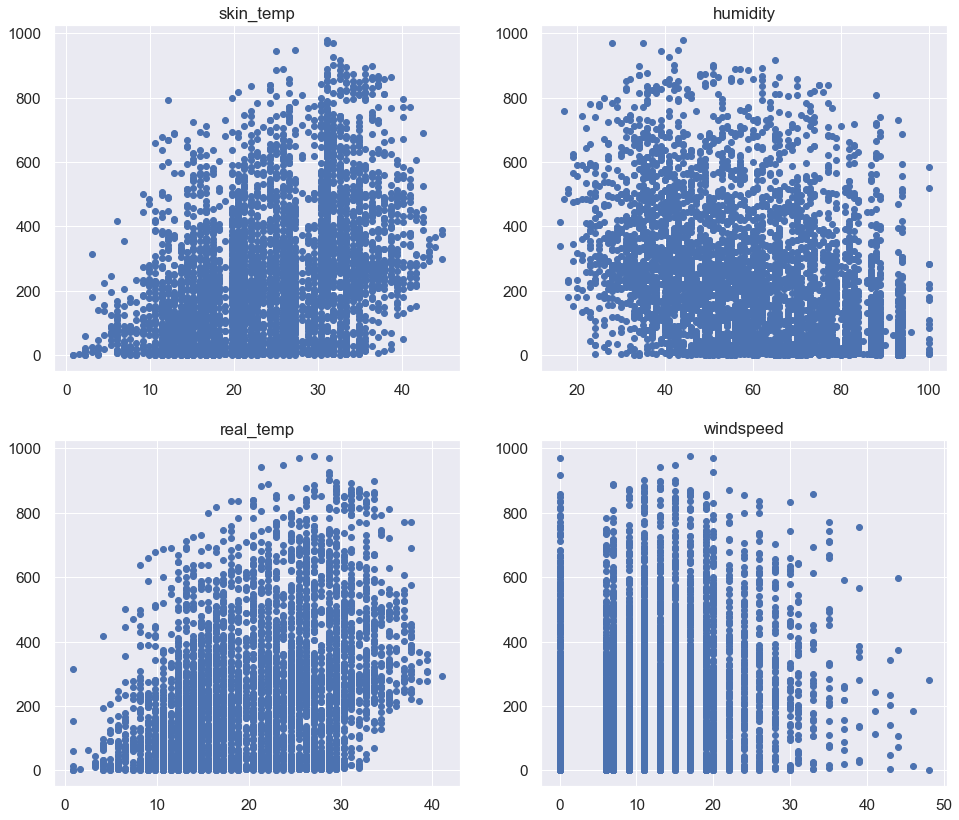

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
# scatter plot
ax[0][0].scatter(train['skin_temp'], train['count'])
ax[0][1].scatter(train['humidity'], train['count'])
ax[1][0].scatter(train['real_temp'], train['count'])
ax[1][1].scatter(train['windspeed'], train['count'])
 
# title 지정
ax[0][0].set(title='skin_temp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='real_temp')
ax[1][1].set(title='windspeed')
 
plt.show()

In [10]:
# humidity 도 많지는 않지만 0과 100에 데이터가 있는게 보입니다.
# windspeed 에는 이상하게 0에 많은 데이터가 몰려 있는 것을 볼 수 있습니다.
# 풍속이 0이라는 것은 ‘바람이 불지않고 잔잔하다’ 또는 ‘데이터가 비어있다’ 라고 해석할 수 있을 것 같습니다.
# 온도를 나타내는 temp 와 체감 온도를 나타내는 atemp는 count 과의 관계가 유사해 보입니다.

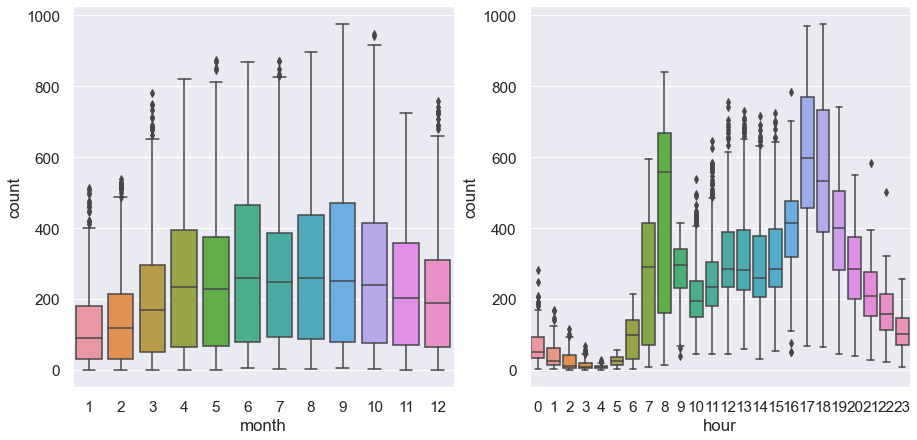

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# holiday 와 workingday 의 boxplot
sns.boxplot(data=train, x='month', y='count', ax=ax[0])
sns.boxplot(data=train, x='hour', y='count', ax=ax[1])
 
plt.show()

In [12]:
# boxplot을 보면 날짜와 기상환경에 대한 킥보드 수요량은 큰 차이가 있는 것으로 보입니다.
# month 과 hour 모두 킥보드 수요량에 유의미한 영향을 주는 것 같습니다.
# 특히, 겨울쯤에는 킥보드수요량이 거의 없는 것을 확인할 수 있습니다.
# 그리고, 새벽 시간대에도 킥보드수요량이 거의 없는 것을 확인할 수 있습니다.

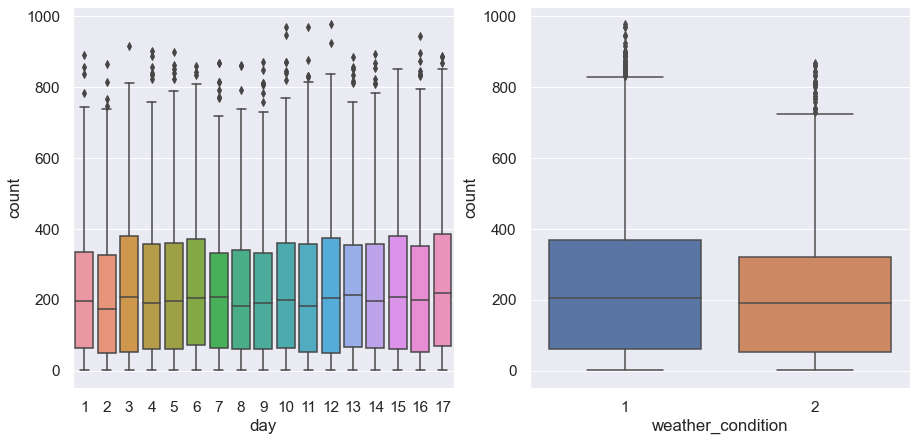

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# holiday 와 workingday 의 boxplot
sns.boxplot(data=train, x='day', y='count', ax=ax[0])
sns.boxplot(data=train, x='weather_condition', y='count', ax=ax[1])
 
plt.show()

In [14]:
# boxplot을 보면 day에 대한 킥보드 수요량은 큰 차이가 없는 것으로 보입니다.
# weather_condition은 킥보드 수요량에 유의미한 영향을 주는 것 같습니다.
# {1:화창한 날씨, 2:구름이 끼고 어두운 날, 3:가볍게 비, 눈이 내리는 날, 4:비,눈이 많이 내리는 날}
# 3, 4번 날씨에서는 킥보드 수요량이 전혀 없는 것을 확인할 수 있습니다.
# boxplot을 살펴본 결과 위쪽으로 크게 벗어난 값이 다수 존재하기 때문에 
#너무 벗어난 값은 처리해줘야 할 것 같습니다.

In [15]:
# # weather boxplot을 다른 방법으로 확인해 봅니다.
# # 날씨명은 간단하게 1:Sunny / 2:Cloud / 3:Light / 4:Heavy 로 변경해서 확인합니다.
# fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# # season 와 weather 의 boxplot
# sns.boxplot(data=train, x='weather_condition', y='count', ax=ax[0])
# sns.boxplot(data=train, x='weather_condition', y='count', ax=ax[1])
 
# #x축 이름 변경
# ax[0].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])
# ax[1].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])
 
# plt.show()

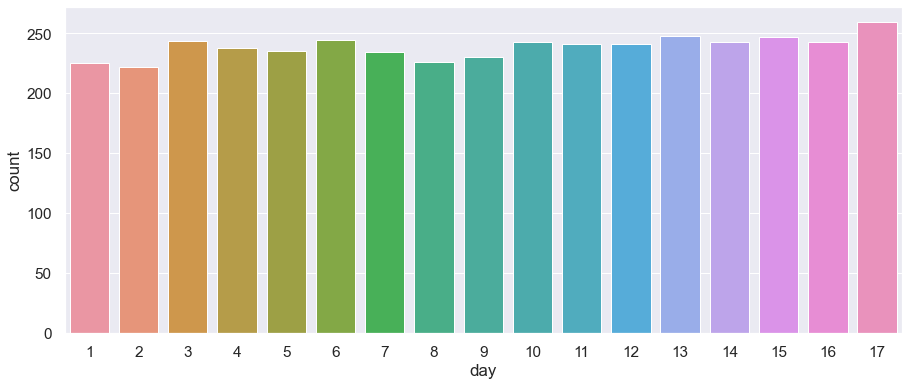

In [16]:
# 이제 날짜와 시간을 사용한 시각화를 진행해봅니다.

#일별 대여량 그래프를 확인합니다.

fig, ax = plt.subplots(figsize=(15,6))
 
# 일별 대여량
sns.barplot(data=train, x='day', y='count', ax=ax, ci=None)
 
plt.show()

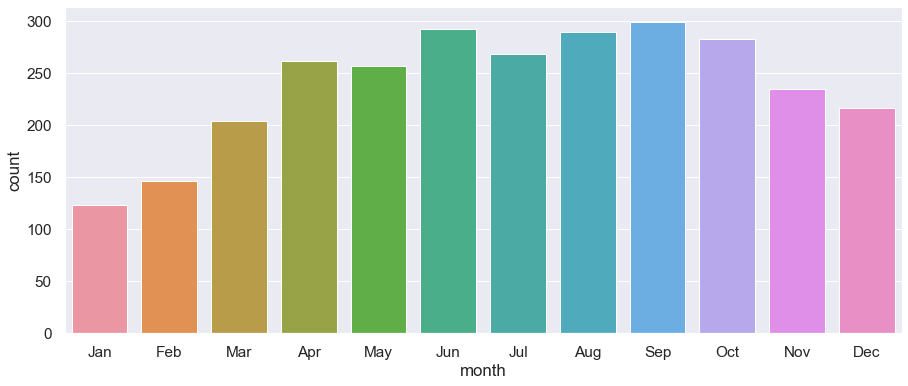

In [17]:
# 일별 그래프에서는 특별한 점을 찾지 못했습니다.
# 월별 대여량 그래프를 확인합니다.

fig, ax = plt.subplots(figsize=(15,6))
 
# 월별 대여량
sns.barplot(data=train, x='month', y='count', ax=ax, ci=None)
 
# x축 값이름 변경
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
ax.set(xticklabels=labels)
 
plt.show()

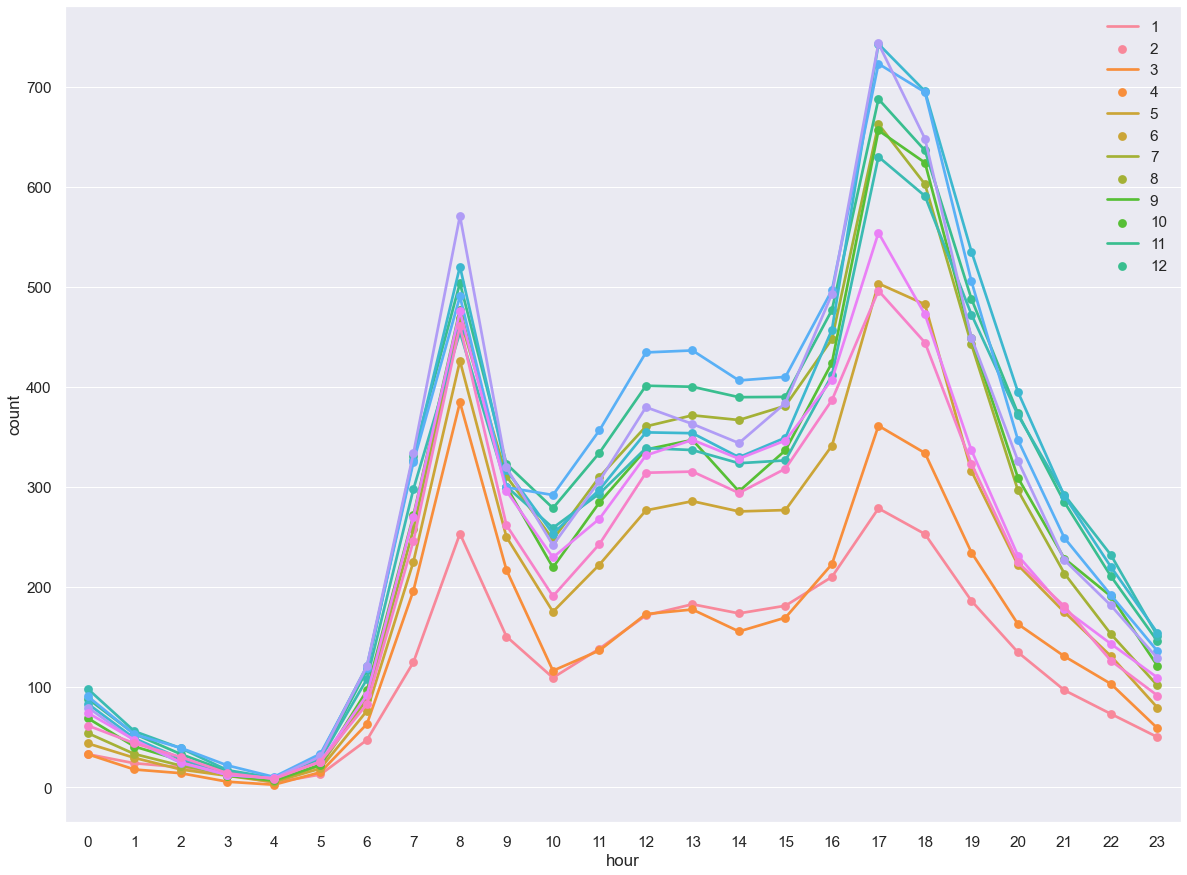

In [18]:
# 다른 월에 비해 겨울~늦겨울쯤인 1,2,3월이 대여량이 적은 편입니다.
# 계절에 따른 시간별 대여량을 확인해 봅니다.

fig, ax = plt.subplots(figsize=(20,15))
sns.pointplot(data=train, x='hour', y='count',hue='month', ax=ax, ci=None)
labels=['1', '2', '3', '4','5', '6', '7', '8','9', '10', '11', '12']
ax.legend(labels=labels)

plt.show()

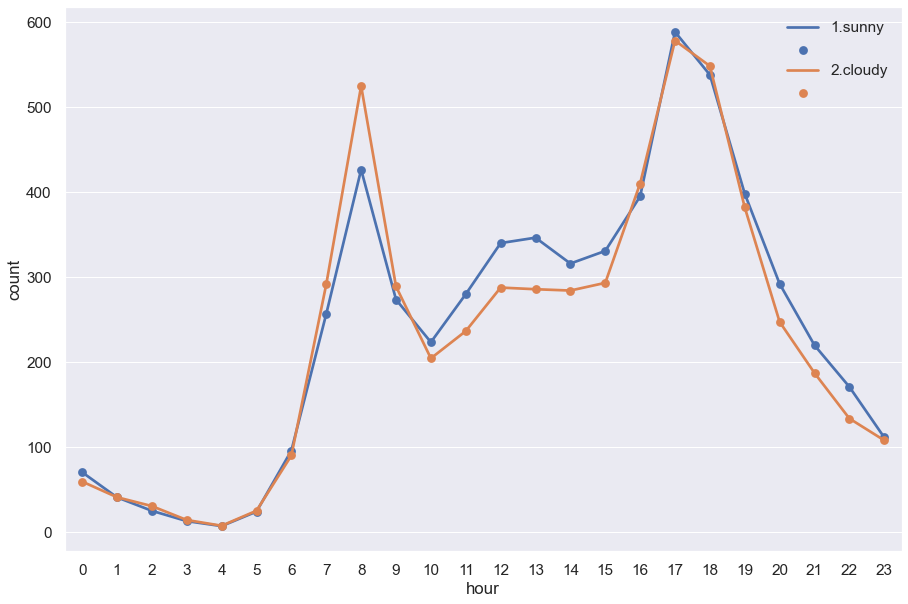

In [19]:
# 출퇴근 시간으로 예상되는 8시, 17시, 18시에 대여량이 가장 높습니다.
# 1월, 2월의 대여량이 다른 계절에 비해 상대적으로 낮게 나옵니다.
# 이때, 3월보다 12월 대여량이 더 높아서 신기했습니다.

# 날씨에 따른 시간별 대여량을 알아봅니다.
fig, ax = plt.subplots(figsize=(15,10))
 
# 날씨에 따른 시간별 대여량
sns.pointplot(data=train, x='hour', y='count',hue='weather_condition', ax=ax, ci=None)
 
# x축 값이름 변경
labels=['1.sunny', '', '2.cloudy', '']
ax.legend(labels=labels)
 
plt.show()

In [20]:
# 출퇴근 시간이라고 예상되는 8시, 17시, 18시가 가장 대여량이 많습니다.
# 3.4.번 날시는 대여량이 전혀 없어서 나타나지 않는 것을 볼 수 있습니다.

# EDA를 진행하면서 데이터의 분포를 확인했고 Feature 들을 이용해 시각화를 하며 데이터 간 특징을 
#찾아내는 과정을 진행했습니다. 
#이제 찾아낸 특징들을 바탕으로 Feature Engineering을 하며 전처리 과정을 진행하겠습니다.

### 데이터 전처리

In [21]:
# 결측치 확인
train.isnull().sum()

index                 0
month                 0
day                   0
hour                  0
weather_condition     0
real_temp            39
skin_temp            61
humidity             42
windspeed            31
count                 0
dtype: int64

In [22]:
train[train.isnull().any(axis=1)].head()

,index,month,day,hour,weather_condition,real_temp,skin_temp,humidity,windspeed,count
6,7,1,1,6,1,NaN,13.635,93.0,8.9981,2
17,18,1,1,17,2,19.68,NaN,48.0,11.0014,111
31,32,1,2,8,1,9.84,11.365,NaN,16.9979,53
49,50,1,3,2,1,7.38,8.335,51.0,NaN,3
68,69,1,3,21,1,4.10,5.305,NaN,15.0013,68


In [23]:
# # 결측치 갖는 행 모두 삭제 : axis=0이 행 방향을 의미
# train.dropna(subset=['real_temp', 'skin_temp', 'humidity', 'windspeed'], axis=0, inplace=True)

In [24]:
# # 행 삭제로 변경된 index 재정렬
# train = train.reset_index()

# # 이전 index 열 삭제
# train = train.drop(['index','level_0'], axis=1)

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
imputer.fit(train)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.44450e+03, 7.00000e+00, 9.00000e+00, 1.20000e+01, 1.00000e+00,
       2.13200e+01, 2.42400e+01, 6.00000e+01, 1.10014e+01, 2.00000e+02])

In [28]:
# SimpleImputer로 계산한 중간값과 중간값 속성을 이용해 계산한 값이 같은지 비교
imputer.statistics_ == train.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
X = imputer.transform(train)
# 넘파이 배열
# 넘파이는 속도가 빨라서 연산용으로 사용
type(X)

numpy.ndarray

In [30]:
# 판다스 데이터프레임으로 변환

train = pd.DataFrame(X, columns=train.columns,
                          index=train.index)

#결측치 처리 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4888 non-null   float64
 1   month              4888 non-null   float64
 2   day                4888 non-null   float64
 3   hour               4888 non-null   float64
 4   weather_condition  4888 non-null   float64
 5   real_temp          4888 non-null   float64
 6   skin_temp          4888 non-null   float64
 7   humidity           4888 non-null   float64
 8   windspeed          4888 non-null   float64
 9   count              4888 non-null   float64
dtypes: float64(10)
memory usage: 382.0 KB


In [31]:
train

,index,month,day,hour,weather_condition,real_temp,skin_temp,humidity,windspeed,count
0,1.0,1.0,1.0,0.0,1.0,14.76,18.940,66.0,0.0000,48.0
1,2.0,1.0,1.0,1.0,1.0,14.76,17.425,66.0,8.9981,93.0
2,3.0,1.0,1.0,2.0,1.0,13.12,17.425,76.0,0.0000,75.0
3,4.0,1.0,1.0,3.0,1.0,12.30,16.665,81.0,0.0000,52.0
4,5.0,1.0,1.0,4.0,1.0,11.48,15.150,81.0,6.0032,8.0
...,...,...,...,...,...,...,...,...,...,...
4883,4884.0,12.0,17.0,19.0,2.0,17.22,21.210,88.0,8.9981,340.0
4884,4885.0,12.0,17.0,20.0,2.0,17.22,21.210,94.0,16.9979,200.0
4885,4886.0,12.0,17.0,21.0,2.0,17.22,21.210,94.0,8.9981,120.0
4886,4887.0,12.0,17.0,22.0,2.0,17.22,21.210,94.0,8.9981,54.0


In [32]:
train.corr()

,index,month,day,hour,weather_condition,real_temp,skin_temp,humidity,windspeed,count
index,1.000000,0.996521,0.083147,0.003051,0.099658,0.216260,0.213873,0.202654,-0.137329,0.156408
month,0.996521,1.000000,-0.000043,-0.001833,0.101760,0.218737,0.217968,0.206909,-0.139382,0.152388
day,0.083147,-0.000043,1.000000,-0.000257,-0.017274,-0.025530,-0.044777,-0.024651,0.008999,0.030397
hour,0.003051,-0.001833,-0.000257,1.000000,-0.070635,0.161848,0.158410,-0.312333,0.167850,0.436762
weather_condition,0.099658,0.101760,-0.017274,-0.070635,1.000000,-0.055504,-0.049942,0.237206,-0.070203,-0.047103
real_temp,0.216260,0.218737,-0.025530,0.161848,-0.055504,1.000000,0.963345,-0.085533,-0.027615,0.373784
skin_temp,0.213873,0.217968,-0.044777,0.158410,-0.049942,0.963345,1.000000,-0.062960,-0.063053,0.369277
humidity,0.202654,0.206909,-0.024651,-0.312333,0.237206,-0.085533,-0.062960,1.000000,-0.361939,-0.344380
windspeed,-0.137329,-0.139382,0.008999,0.167850,-0.070203,-0.027615,-0.063053,-0.361939,1.000000,0.142263
count,0.156408,0.152388,0.030397,0.436762,-0.047103,0.373784,0.369277,-0.344380,0.142263,1.000000


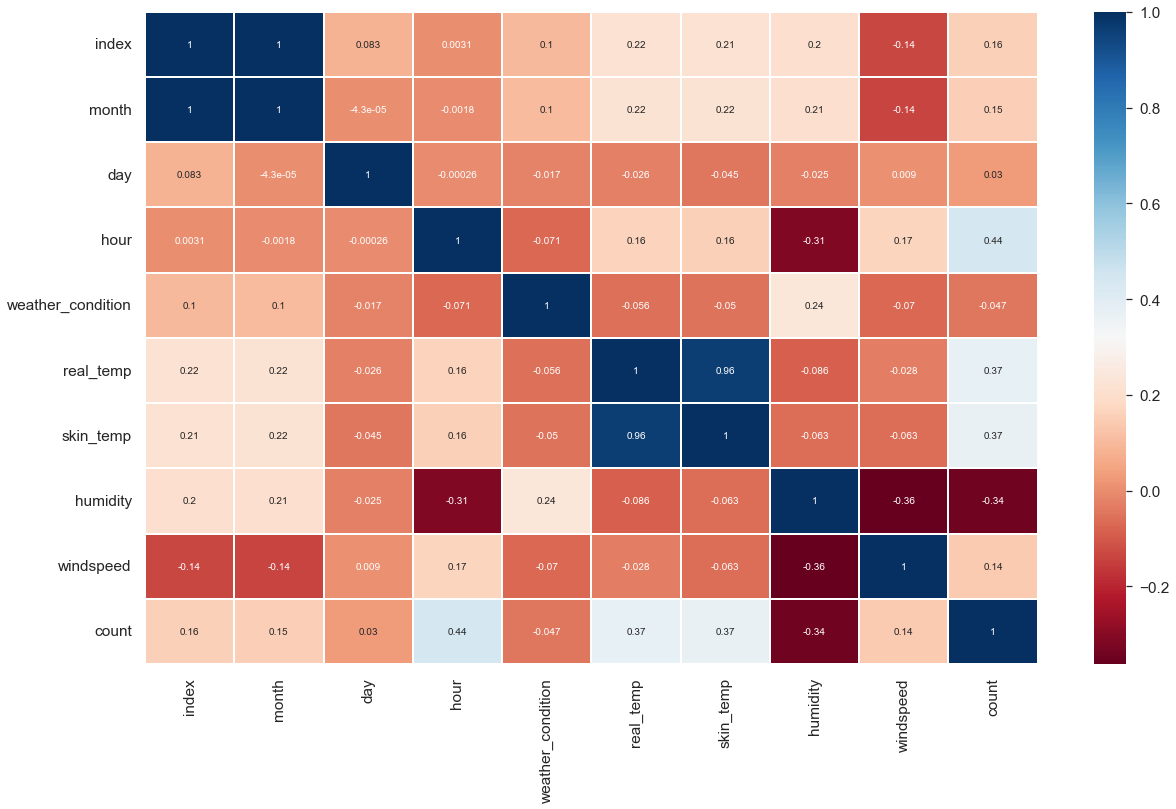

In [33]:
# 상관관계에 사용할 Feature 지정
# index를 제외한 Feature 들을 추려서 상관관계 지수를 heatmap으로 확인해 봅니다.
 
fig, ax = plt.subplots(figsize=(20,12))
 
# heatmap
sns.heatmap(data=train.corr(), ax=ax, linewidths=0.1, linecolor='white', annot=True, cmap=plt.cm.RdBu)

plt.show()

<AxesSubplot:>

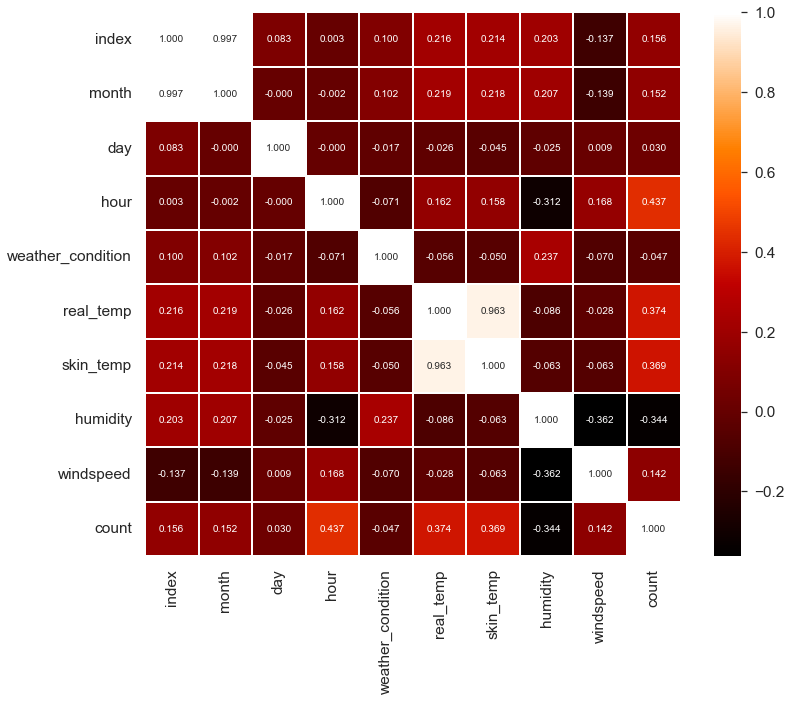

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), linewidths=0.1, vmax=1, 
            cmap=plt.cm.gist_heat, annot=True, fmt=".3f")

In [35]:
# heatmap에서는 real_temp 와 skin_temp 의 상관 관계가 매우 높게 나왔습니다. 
# 둘의 상관관계는 1에 가까운 양의 상관관계, 0.975인것을 확인할 수 있습니다.
# 둘은 거의 같은 Feature 라고 생각해도 될 것 같습니다.

# 그 다음으로는 hour와 count의 상관 관계가 0.437로 높게 나옴을 확인할 수 있습니다.

# 이제 학습에 사용할 Feature를 선별해봅시다.

# 날짜와 시간에 관련된 Feature 는 month, day, hour이 있습니다.
# 숫자형으로 나타나는 h month, hour 를 사용하고 day는 제거해 줍니다.

# 사용하지 않는 feature 삭제
train.drop(['day'], inplace=True, axis=1)
 
# month, hour 은 범주형으로 변경
# train['month'] = train['month'].astype('category')
# train['hour'] = train['hour'].astype('category')
 
train.head()

,index,month,hour,weather_condition,real_temp,skin_temp,humidity,windspeed,count
0,1.0,1.0,0.0,1.0,14.76,18.940,66.0,0.0000,48.0
1,2.0,1.0,1.0,1.0,14.76,17.425,66.0,8.9981,93.0
2,3.0,1.0,2.0,1.0,13.12,17.425,76.0,0.0000,75.0
3,4.0,1.0,3.0,1.0,12.30,16.665,81.0,0.0000,52.0
4,5.0,1.0,4.0,1.0,11.48,15.150,81.0,6.0032,8.0


In [36]:
# weather 은 범주형 Feature 입니다.
# 숫자로 표현돼 있으니 One-Hot Encoding을 진행해 줍니다.
# One-hot encoding 진행
train = pd.get_dummies(train, columns=['weather_condition'])
 
train.head()

,index,month,hour,real_temp,skin_temp,humidity,windspeed,count,weather_condition_1.0,weather_condition_2.0
0,1.0,1.0,0.0,14.76,18.940,66.0,0.0000,48.0,1,0
1,2.0,1.0,1.0,14.76,17.425,66.0,8.9981,93.0,1,0
2,3.0,1.0,2.0,13.12,17.425,76.0,0.0000,75.0,1,0
3,4.0,1.0,3.0,12.30,16.665,81.0,0.0000,52.0,1,0
4,5.0,1.0,4.0,11.48,15.150,81.0,6.0032,8.0,1,0


In [37]:
# real_temp 와 skin_temp 는 상관관계가 매우 높고 두 Feature 의 의미가 비슷하기 때문에 temp만 사용하기로 합니다.
# windspeed 는 0값이 많은 특징이 있습니다.
# 0이 측정을 하지 못한 결측값일 수 있지만 NaN과 같이 표시가 돼있지 않습니다.
# 바람이 불지않는 잔잔한 상태를 0으로 나타내는 경우도 있다고 합니다.
# 그렇기 때문에 우선은 0값 그대로 진행합니다.
# skin_temp 만 지워줍니다.

# skin_temp 제거
train.drop('skin_temp', inplace=True, axis=1)

train.head()

,index,month,hour,real_temp,humidity,windspeed,count,weather_condition_1.0,weather_condition_2.0
0,1.0,1.0,0.0,14.76,66.0,0.0000,48.0,1,0
1,2.0,1.0,1.0,14.76,66.0,8.9981,93.0,1,0
2,3.0,1.0,2.0,13.12,76.0,0.0000,75.0,1,0
3,4.0,1.0,3.0,12.30,81.0,0.0000,52.0,1,0
4,5.0,1.0,4.0,11.48,81.0,6.0032,8.0,1,0


In [38]:
# train 데이터에 적용한 내용을 test 데이터에도 적용해 줍니다.
# train 데이터 할때 같이 하는게 편함
 
# month와 hour 범주화 타입으로 변경
# test['month'] = test['month'].astype('category')
# test['hour'] = test['hour'].astype('category')
 
# One-hot encoding
test = pd.get_dummies(test, columns=['weather_condition'])
 
# 사용하지 않는 feature 삭제
test.drop(['index', 'skin_temp'], inplace=True, axis=1)
    
test.head()

,month,day,hour,real_temp,humidity,windspeed,weather_condition_1,weather_condition_2
0,1,18,0,18.86,77.0,22.0028,0,1
1,1,18,1,18.86,77.0,22.0028,0,1
2,1,18,2,18.04,51.0,32.9975,0,1
3,1,18,3,18.04,51.0,32.9975,0,1
4,1,18,4,13.94,46.0,35.0008,1,0


## 검증 데이터로 분리

베이스 코드에는 모델의 성능을 비교해보기 위해 train 데이터에서 일부를 validation 데이터로 나눠서 진행

### Train, Test data 분할하기

<AxesSubplot:>

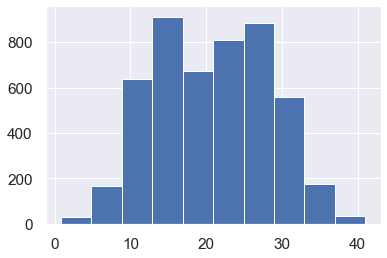

In [39]:
# 데이터를 분석하기 전에 분할해두지 않으면 데이터 스누핑 편향(data snooping bias)이 발생할 수 있다.
# 데이터 스누핑 편향(data snooping bias): 일반화 오차가 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 X
# dataset을 train_set 과 test_set으로 구분하고 test_set는 절대 열어보고 분석하지 않는다.
# 분할(split)비율은 일반적으로 train_set : test_set = 8 : 2이지만, 고정값은 아니다.

#계층적 샘플링 : test set이 전체 data를 대표하도록 전체 data의 비율을 유지해서 뽑는것. 
#=> 무작위로 뽑으면 샘플링 편향이 생길 수 있기 때문

# 계층적 샘플링 사용
# real_temp가 킥보드 수요량을 예측하는데 중요 -> test set이 전체 data set의 여러 카테고리를 잘 대표해야함.
# 온도-> 연속적인 숫자형 특성, 온도에 대한 카테고리 특성을 만들어야 함. 
# 온도가 10~35 사이에 모여있음
# 계층별로 충분한 샘플수 필요, 너무 많은 계층으로 나누면 안됨

train["real_temp"].hist()

In [40]:
# #계층 분할 후 새로운 column 생성
# #pd.cut으로 income_cat column과 5개의 카테고리 생성
# #각 구간의 label은 1~5

# train["real_temp_cat"] = pd.cut(train["real_temp"],
#                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
#                                labels=[1, 2, 3, 4, 5])

In [41]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train, test_size = 0.2, random_state=42, shuffle=True)

In [42]:
X_train = train.drop(['count'], axis = 1)
X_val = val_data.drop(['count'], axis = 1)
X_test = test

y_train = train['count']
y_val = val_data['count']


print("X_train의 shape: ", X_train.shape)
print("X_val의 shape: ", X_val.shape)
print("X_test의 shape: ", X_test.shape)
print("\t")
print("y_train의 shape: ", y_train.shape)
print("y_val의 shape: ", y_val.shape)

X_train의 shape:  (4888, 8)
X_val의 shape:  (978, 8)
X_test의 shape:  (576, 8)
	
y_train의 shape:  (4888,)
y_val의 shape:  (978,)


In [43]:
print(train_data.shape)
print(val_data.shape)

(3910, 9)
(978, 9)


In [44]:
X_train

,index,month,hour,real_temp,humidity,windspeed,weather_condition_1.0,weather_condition_2.0
0,1.0,1.0,0.0,14.76,66.0,0.0000,1,0
1,2.0,1.0,1.0,14.76,66.0,8.9981,1,0
2,3.0,1.0,2.0,13.12,76.0,0.0000,1,0
3,4.0,1.0,3.0,12.30,81.0,0.0000,1,0
4,5.0,1.0,4.0,11.48,81.0,6.0032,1,0
...,...,...,...,...,...,...,...,...
4883,4884.0,12.0,19.0,17.22,88.0,8.9981,0,1
4884,4885.0,12.0,20.0,17.22,94.0,16.9979,0,1
4885,4886.0,12.0,21.0,17.22,94.0,8.9981,0,1
4886,4887.0,12.0,22.0,17.22,94.0,8.9981,0,1


In [45]:
X_train.shape

(4888, 8)

In [46]:
#결측치 처리 확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  4888 non-null   float64
 1   month                  4888 non-null   float64
 2   hour                   4888 non-null   float64
 3   real_temp              4888 non-null   float64
 4   humidity               4888 non-null   float64
 5   windspeed              4888 non-null   float64
 6   weather_condition_1.0  4888 non-null   uint8  
 7   weather_condition_2.0  4888 non-null   uint8  
dtypes: float64(6), uint8(2)
memory usage: 238.8 KB


### 모델링

In [47]:
# 전동킥보드 수요를 예측하는 대회이므로 회귀(Regression) 모델을 사용합니다.
# 이 대회는 회귀 평가 지표중 하나인 R2(R Squared Score) 결정계수 Score 로 평가합니다.

from sklearn.metrics import r2_score
# r-square 함수사용
# r2 = r2_score(y_test, y_pred)

### 모델 선택

In [48]:
# 앙상블(Ensemble) 회귀 모델로 예측을 진행합니다.
# Random Foreset
# Adaboost
# Bagging

from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import AdaBoostRegressor # AdaBoost
from sklearn.ensemble import BaggingRegressor # Bagging
from catboost import CatBoostClassifier

### 교차 검증

In [49]:
# # Train set 의 불균형을 방지하기 위해 K-Fold 교차검증을 이용해 모델의 성능을 테스트 합니다.
# # kfold 준비
# from sklearn.model_selection import KFold, cross_val_score
 
# # kfold 설정
# kfold = KFold(n_splits=10, random_state=1230, shuffle=True)

# # 사용할 모델 설정
# models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor()]
# regressors = ['RandomForest', 'AdaBoost', 'Bagging']
# score_result = []   

# # Kfold 교차 검증
# for x in models:
#     Rgr = x
#     score = cross_val_score(Rgr, X_train, y_train, cv=kfold, scoring='r2')
#     score_result.append(score.mean())
    
# # 결과를 dataframe 으로 변경
# Kfold_score_result = pd.DataFrame({'Score' : score_result}, index=regressors)
# Kfold_score_result

In [50]:
# # Train set 의 불균형을 방지하기 위해 K-Fold 교차검증을 이용해 모델의 성능을 테스트 합니다.
# # kfold 준비
# from sklearn.model_selection import KFold, cross_val_score
 
# # kfold 설정
# kfold = KFold(n_splits=10, random_state=1230, shuffle=True)

# # 사용할 모델 설정
# models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor()]
# regressors = ['xgboost', 'CatBoost', 'LGBM']
# score_result = []   

# # Kfold 교차 검증
# for x in models:
#     Rgr = x
#     score = cross_val_score(Rgr, X_train, y_train, cv=kfold, scoring='r2')
#     score_result.append(score.mean())
    
# # 결과를 dataframe 으로 변경
# Kfold_score_result = pd.DataFrame({'Score' : score_result}, index=regressors)
# Kfold_score_result

In [51]:
# # Train set 의 불균형을 방지하기 위해 K-Fold 교차검증을 이용해 모델의 성능을 테스트 합니다.
# # kfold 준비
# from sklearn.model_selection import KFold, cross_val_score
 
# # kfold 설정
# kfold = KFold(n_splits=10, random_state=1230, shuffle=True)

# # 사용할 모델 설정
# models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor()]
# regressors = ['MLP', 'CatBoost','AdaBoost']
# score_result = []   

# # Kfold 교차 검증
# for x in models:
#     Rgr = x
#     score = cross_val_score(Rgr, X_train, y_train, cv=kfold, scoring='r2')
#     score_result.append(score.mean())
    
# # 결과를 dataframe 으로 변경
# Kfold_score_result = pd.DataFrame({'Score' : score_result}, index=regressors)
# Kfold_score_result

In [52]:
# Score는 낮을 수록 성능이 좋다는 지표입니다.
# AdaBoost 을 선택하는 것이 좋아보입니다.

## 모델 학습

베이스라인에서는 간단하게 랜덤포레스트회귀를 사용하여 성능평가지표인 MAE 사용

In [53]:
# target='count' # 목표 변수 'nerdiness'를 설정
# # 'VCL' 열, 'hand' 및 'ASD'를 포함하는 제외된 값 목록에서 특성 집합을 제외
# ex_vals=['day']
# features=np.setdiff1d(train.columns.values,target)
# features
# new_features=np.setdiff1d(features,ex_vals)
# new_features

In [54]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler,RobustScaler
# # familysize, age, introelapse, testelapse >> 사이즈 차이 필요
# #VCL 1  4 5 6 7 9 10 12 14 15 16, hand, ASD >> 이상치

# # Scikit-learn 라이브러리의 StandardScaler 및 RobustScaler를 모두 사용하여 모든 특성을 스케일링
# scaler_s=StandardScaler()
# scaler_r=RobustScaler()


# # for val in ['VCL1','VCL2','VCL4','VCL5','VCL6','VCL7','VCL9','VCL10','VCL12','VCL13','VCL14','VCL15','VCL16','hand','ASD']:
# # 	scaler_r.fit(train_all[[val]])
# # 	train_all[val]=scaler_r.transform(train_all[[val]])
# # 	test[val]=scaler_r.transform(test[[val]])

# # for val in ['familysize','age','introelapse','testelapse','surveyelapse']:
# # 	train_all[val]=np.log1p(train_all[val])
# # 	test[val]=np.log1p(test[val])

# # for val in ['familysize','age','introelapse','testelapse']:
# # 	scaler_r.fit(train_all[[val]])
# # 	train_all[val]=scaler_r.transform(train_all[[val]])
# # 	test[val]=scaler_r.transform(test[[val]])

# for val in train[features]:
# 	scaler_s.fit(train[[val]])
# 	train[val]=scaler_s.transform(train[[val]])


# # train 데이터를 train 및 validation 세트로 분할
# train_data,val_data=train_test_split(train,test_size=.2,random_state=42,shuffle=True)


In [55]:
train.describe()

,index,month,hour,real_temp,humidity,windspeed,count,weather_condition_1.0,weather_condition_2.0
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,2444.500000,6.505115,11.513912,20.735029,60.059943,12.672123,239.091858,0.736088,0.263912
std,1411.188388,3.450604,6.919974,7.651890,18.626159,7.966027,208.524558,0.440797,0.440797
min,1.000000,1.000000,0.000000,0.820000,16.000000,0.000000,1.000000,0.000000,0.000000
25%,1222.750000,4.000000,6.000000,14.760000,45.000000,7.001500,60.000000,0.000000,0.000000
50%,2444.500000,7.000000,12.000000,21.320000,60.000000,11.001400,200.000000,1.000000,0.000000
75%,3666.250000,10.000000,18.000000,27.060000,75.000000,16.997900,355.000000,1.000000,1.000000
max,4888.000000,12.000000,23.000000,41.000000,100.000000,47.998800,977.000000,1.000000,1.000000


In [56]:
# pd.set_option('display.max_columns', None)
# train.describe()

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [58]:
# rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=13, n_jobs=-1)
# rnd_clf.fit(X_train, y_train)

# y_rnd_pred = rnd_clf.predict(X_val)

# print(rnd_clf.score(X_train, y_train))
# print(rnd_clf.score(X_val, y_val))
# print(mean_absolute_error(y_val, y_rnd_pred))

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42) 
# 트리 개수, 랜덤 시드 지정
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import classification_report
# # 최상의 하이퍼파라미터를 찾기 위해 Grid Search Cross-Validation을 적용
# from sklearn.model_selection import GridSearchCV

# # CatBoost 라이브러리의 CatBoostClassifier 알고리즘을 사용
# from catboost import CatBoostClassifier

# parameters = {'n_estimators': [200, 500, 1000, 2000], 
#           'learning_rate': [0.1, 0.05, 0.01], 
#           'max_depth': [5, 6, 7, 8], 
#           'subsample': [0.6, 0.8, 0.9, 1.0],
#           'bootstrap_type': ['Poisson']}

# clf_c = CatBoostClassifier()
# GSC_c=GridSearchCV(estimator=clf_c,param_grid=parameters)
# GSC_c.fit(X_train[features],X_train[target])

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",GSC_c.best_estimator_)
# print("\n The best score across ALL searched params:\n",GSC_c.best_score_)
# print("\n The best parameters across ALL searched params:\n",GSC_c.best_params_)

In [64]:
submission = pd.read_csv('submission.csv')

submission

,index,count
0,1,39.307811
1,2,39.307811
2,3,39.307811
3,4,39.307811
4,5,39.307811
...,...,...
571,572,343.253805
572,573,295.806203
573,574,128.365898
574,575,126.180192


# 결과 제출

예측한 결과값을 submission 파일로 생성 

In [67]:
# # # 학습 및 예측
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler를 사용하여 데이터를 스케일링합니다.
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X_train)

# # # 스케일링된 데이터를 사용하여 모델을 학습합니다.
# # model.fit(X_scaled, y_traiin)

# final_model = RandomForestRegressor(n_estimators=100)
# final_model.fit(X_scaled, y_train)
test_predicted = forest_model.predict(X_test)

# test_predicted =GSC_l.predict(test[features])
# submission["count"] = test_predicted
# test_predicted = rnd_clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
X_result = pd.concat([test['index'], X_test],axis=1)
X_result

In [ ]:
sample_sub = pd.DataFrame({'index': X_result['index'], 'count': test_predicted})
sample_sub

In [ ]:
sample_sub.to_csv("submission.csv", index=False)

## 데이터 전처리

- 해당 데이터가 연속적인 시간의 값이기에 결측치를 앞 방향 값으로 채웠습니다.
- 수치형 데이터가 문자로 표시되는d 값이 있을 수도 있기에 전부 수치형으로 변경하였습니다.

In [ ]:
# #수치형 변수에 포함되는 데이터 타입 선정

# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


# #결측치는 위 데이터로 채우기

# train[train.select_dtypes(include=numerics).columns] = \
#     train[train.select_dtypes(include=numerics).columns].fillna(method='ffill')

# test[test.select_dtypes(include=numerics).columns] = \
#     test[test.select_dtypes(include=numerics).columns].fillna(method='ffill')

In [ ]:
# print("train_data 결측치 확인: ",train.isnull().sum())
# print("----------------------------------------------------")
# print("test_data 결측치 확인: ",test.isnull().sum())

In [ ]:
# test_not_index = test.drop(['index'], axis=1)
# test_not_index

In [ ]:
# train_not_index = train.drop(['index'], axis=1)
# train_not_index